In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

## Vertrautmachen mit den Daten - Deskriptive Analyse

In [5]:
#get an idea about the dataset:
#this is a Bunch Object, a dictionary-like object
california_housing = fetch_california_housing()

# Ausgabe der Features und Zielvariable
print(california_housing.feature_names)
print(california_housing.target_names)
print(california_housing.data.shape)
print(california_housing.target.shape)

df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
Y = california_housing.target

df = df.assign(target=Y)

df.to_csv('data_immobilien.csv', index=False)

df.info() #keine NaNs
df.head()


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']
(20640, 8)
(20640,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Data Overview on a glance

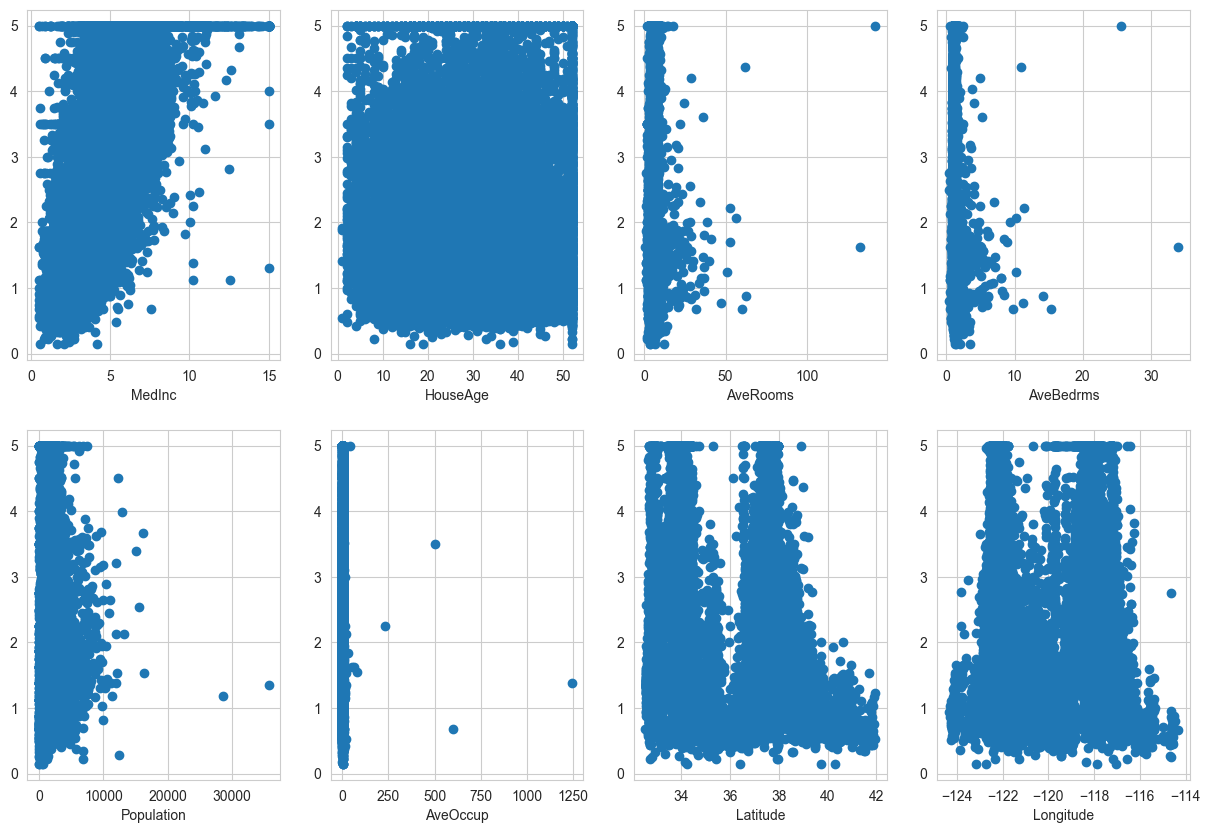

In [6]:
fig, ax = plt.subplots(2,4, figsize=(15,10))
df_col_names = df.columns
for i, axi in enumerate(ax.flat):
    axi.scatter(df[df_col_names[i]], Y)
    axi.set_xlabel(df_col_names[i])
plt.show()

In [7]:
data_single = df[df['AveOccup'] > 1000]
data_single.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375


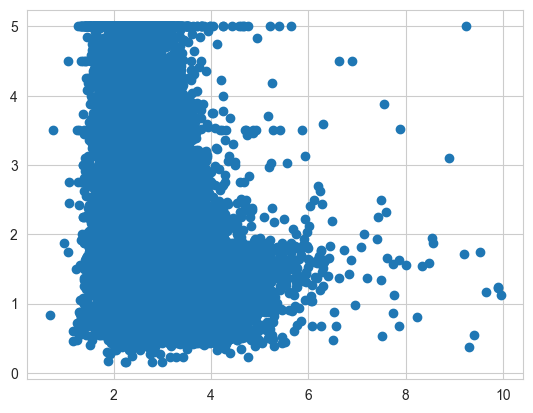

In [8]:
data = df[df['AveOccup'] < 10]
x=data.AveOccup
Y=data.target
plt.scatter(x,Y)


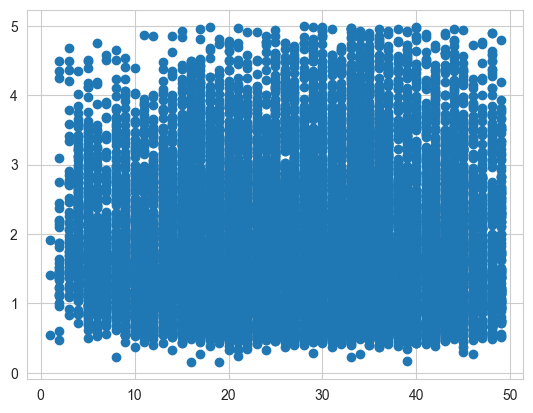

In [9]:
data = df[(df['AveOccup'] < 8) & (df["HouseAge"] < 50) & (df["target"] < 5) & (df["AveRooms"] < 8)]
x=data.HouseAge
Y=data.target
plt.scatter(x,Y)

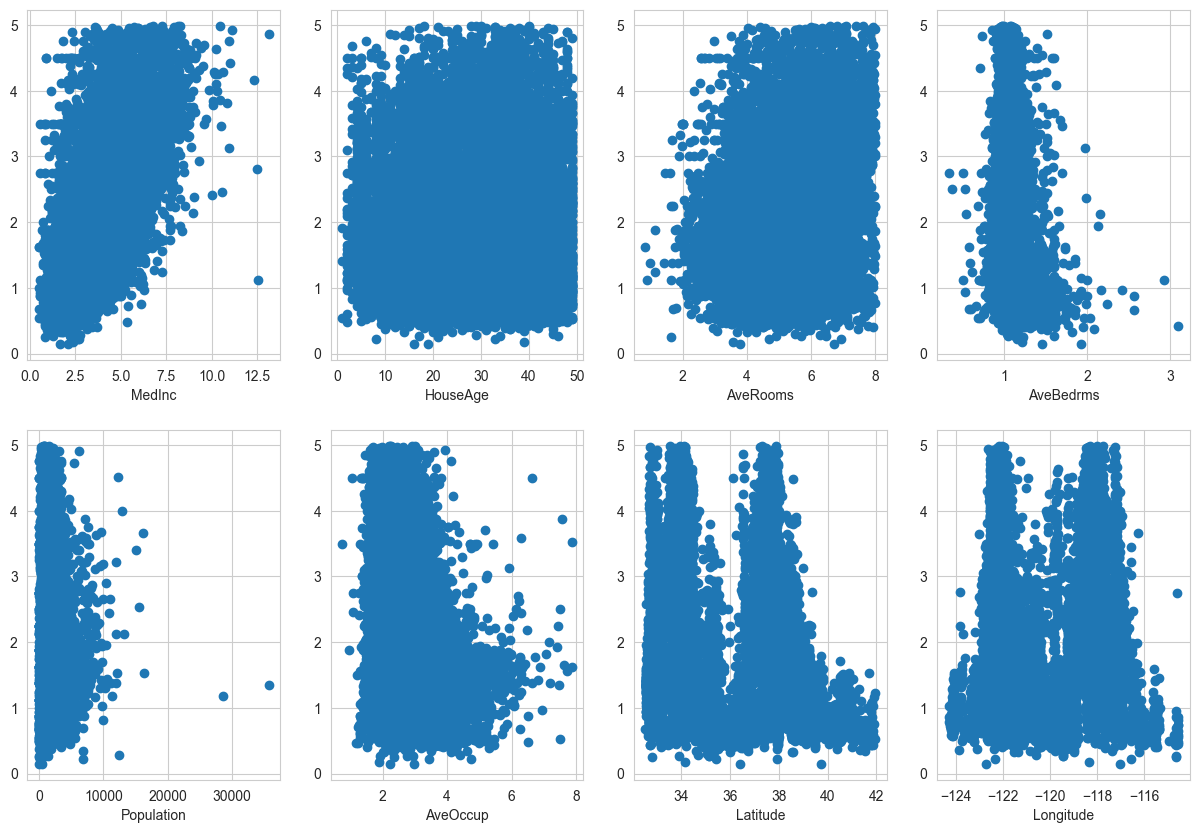

In [10]:
fig, ax = plt.subplots(2,4, figsize=(15,10))
Y = data.target
df_col_names = data.columns
for i, axi in enumerate(ax.flat):
    axi.scatter(data[df_col_names[i]], Y)
    axi.set_xlabel(df_col_names[i])
plt.show()

## Korrelationen

Korrelationskoeffizient:  0.15177634012750751
Korrelationskoeffizient:  -0.9278704134506434
Korrelationskoeffizient:  -0.04921536621900856


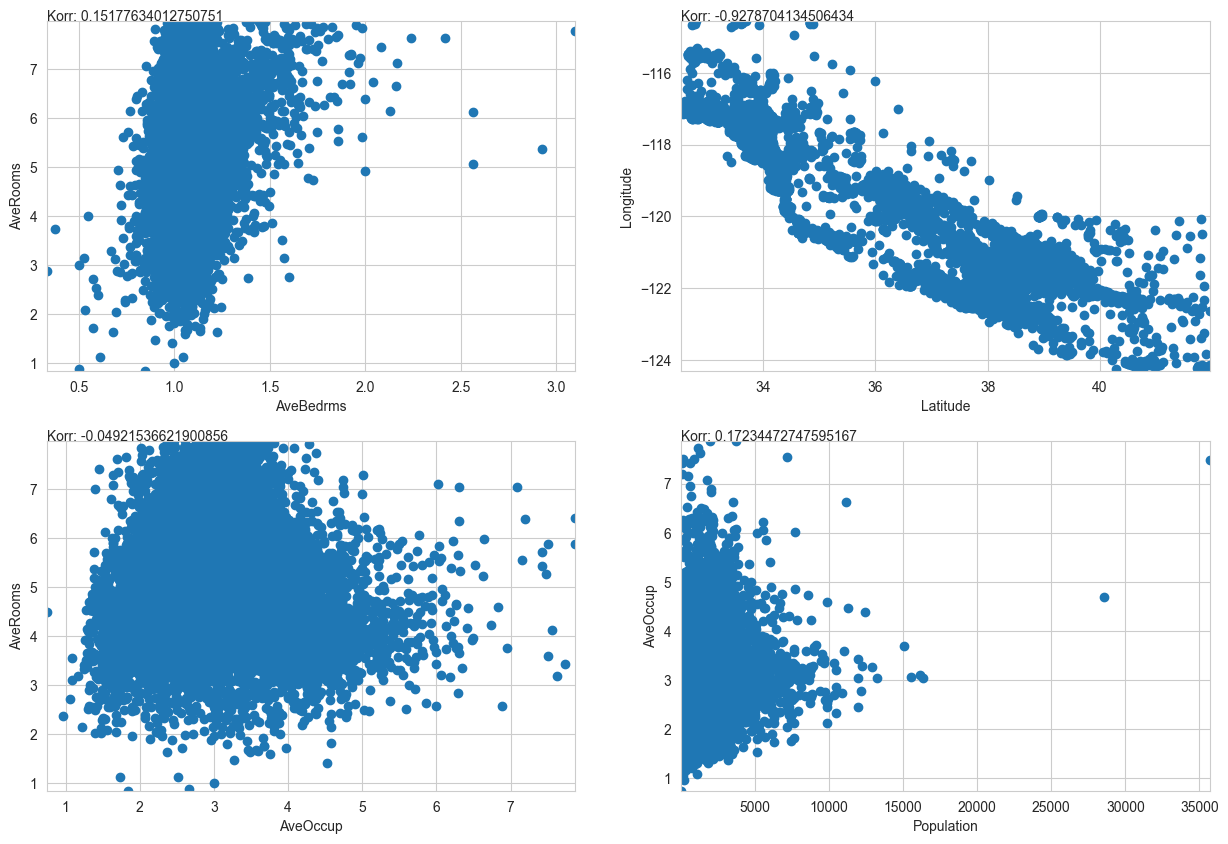

Korrelationskoeffizient:  0.17234472747595167


In [11]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

x = data["AveBedrms"]
y = data["AveRooms"]
ax[0][0].scatter(x,y)
ax[0][0].set_xlim(min(x),max(x))
ax[0][0].set_ylim(min(y),max(y))
ax[0][0].set(xlabel='AveBedrms', ylabel='AveRooms')
ax[0][0].text(min(x),max(y),f'Korr: {x.corr(y)}')

print("Korrelationskoeffizient: ", x.corr(y))

x = data["Latitude"]
y = data["Longitude"]
ax[0][1].scatter(x,y)
ax[0][1].set(xlabel='Latitude', ylabel='Longitude')
ax[0][1].set_xlim(min(x), max(x))
ax[0][1].set_ylim(min(y), max(y))
ax[0][1].text(min(x),max(y),f'Korr: {x.corr(y)}')

print("Korrelationskoeffizient: ", x.corr(y))

x = data["AveOccup"]
y = data["AveRooms"]
ax[1][0].scatter(x,y)
ax[1][0].set(xlabel='AveOccup', ylabel='AveRooms')
ax[1][0].set_xlim(min(x), max(x))
ax[1][0].set_ylim(min(y), max(y))
ax[1][0].text(min(x),max(y),f'Korr: {x.corr(y)}')

print("Korrelationskoeffizient: ", x.corr(y))

x = data["Population"]
y = data["AveOccup"]
ax[1][1].scatter(x,y)
ax[1][1].set(xlabel='Population', ylabel='AveOccup')
ax[1][1].set_xlim(min(x), max(x))
ax[1][1].set_ylim(min(y), max(y))
ax[1][1].text(min(x),max(y),f'Korr: {x.corr(y)}')
plt.show()
print("Korrelationskoeffizient: ", x.corr(y))



## Look on the correlation of targed depending on between longitude and latituden 


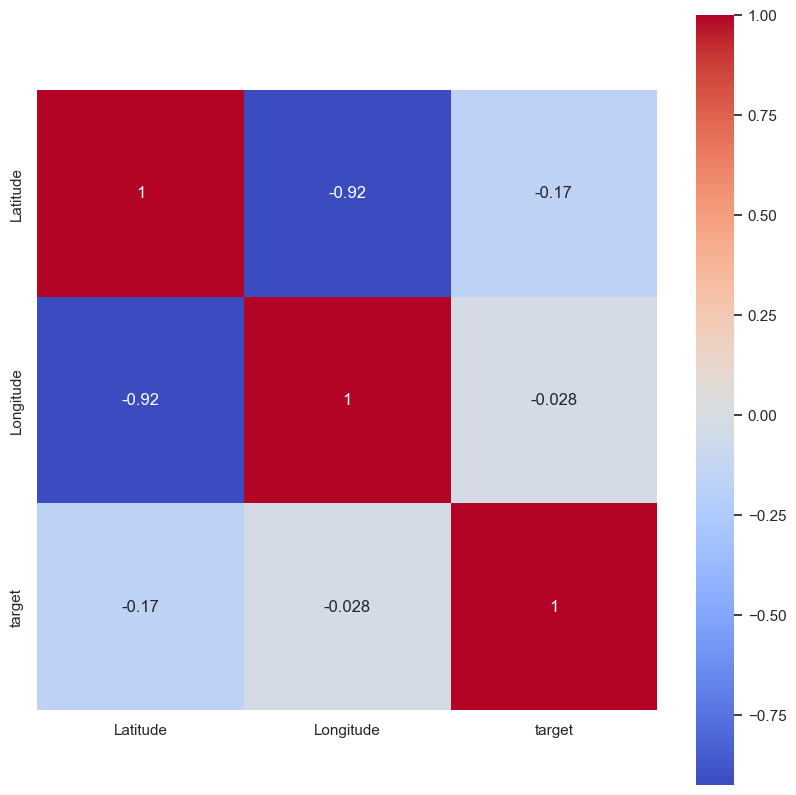

In [12]:
df_new = df[['Latitude', 'Longitude']]
df_new = df_new.assign(target = Y)

sns.set()
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', square=True)
plt.show()

Text(0.5, 0, 'Target')

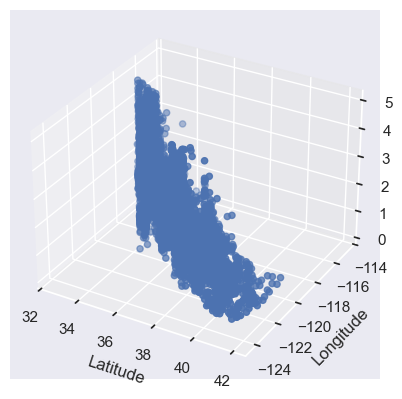

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df_new.Latitude, df_new.Longitude, df_new.target)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Target')

Text(0, 0.5, 'Target')

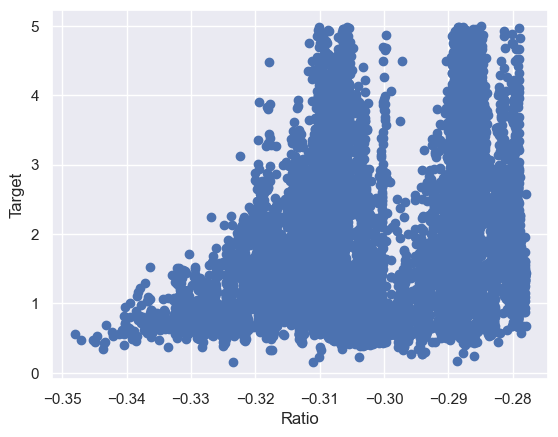

In [14]:
ratio = df.Latitude / df.Longitude

fig = plt.figure()
plt.scatter(ratio, df_new.target)
plt.xlabel('Ratio')
plt.ylabel('Target')



In [15]:
print("Korrelationskoeffizient: ", df_new.target.corr(ratio))
df_exp = df.assign(ratio = ratio)
df_exp.head()

Korrelationskoeffizient:  0.23195218200081846


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,ratio
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,-0.309908
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,-0.309769
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,-0.309637
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,-0.309611
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,-0.309611


## some thought for Using a PCA

Text(0, 0.5, 'Target')

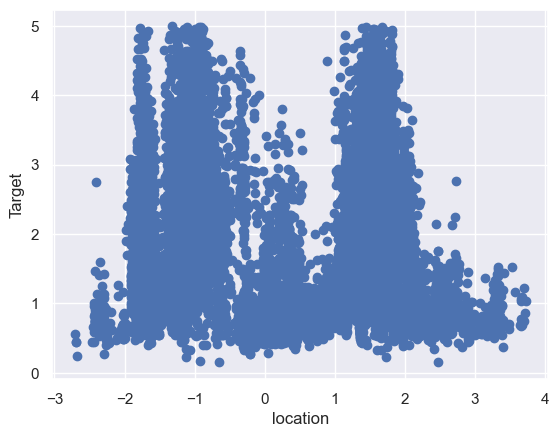

In [16]:
from sklearn.decomposition import PCA

df_pca = df[['Latitude', 'Longitude',]]

#transomieren:
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

pca = PCA(n_components=0.6)  # retain 95% of the variance
pca.fit(df_pca_scaled)

pca_transformed = pca.transform(df_pca_scaled)

location = pca_transformed[:,0]

fig = plt.figure()
plt.scatter(location, df_new.target)
plt.xlabel('location')
plt.ylabel('Target')



## Clean Data Set

In [17]:
df_all = df_exp
df_all = df.assign(target = df_new.target)
df_all.head()
df_all.describe()
df_all.info


<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

In [18]:
#remove borders and outliers
df_clean = df_all
condition1 =df_all['Population'] < 30000
df_clean = df_clean[condition1]
condition2 =df_clean['AveOccup'] < 7
df_clean = df_clean[condition2]
condition3 =df_clean['AveRooms'] < 30
df_clean = df_clean[condition3]
condition4 =df_clean['AveBedrms'] < 7
df_clean = df_clean[condition4]
condition5 = df_clean.target < 5.0
df_clean = df_clean[condition5]
condition6 = df_clean.HouseAge < 50
df_clean = df_clean[condition6]
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 17847 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      17847 non-null  float64
 1   HouseAge    17847 non-null  float64
 2   AveRooms    17847 non-null  float64
 3   AveBedrms   17847 non-null  float64
 4   Population  17847 non-null  float64
 5   AveOccup    17847 non-null  float64
 6   Latitude    17847 non-null  float64
 7   Longitude   17847 non-null  float64
 8   target      17847 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
20,1.3578,40.0,4.524096,1.108434,409.0,2.463855,37.85,-122.27,1.475
21,1.7135,42.0,4.478142,1.002732,929.0,2.538251,37.85,-122.27,1.598


In [19]:
X_clean =df_clean.drop(columns=['target','Latitude','Longitude','HouseAge'])
y = df_clean['target']
scaler = StandardScaler()
X_clean_scaled = scaler.fit_transform(X_clean)

x_train, x_test, y_train, y_test = train_test_split(X_clean_scaled, y, test_size=0.4, random_state=0)
lin_model = LinearRegression() #Objekt eines Modells erstellen
lin_model.fit(x_train, y_train) # Modell trainieren

predicted_y = lin_model.predict(x_test)

mse = mean_squared_error(y_test, predicted_y)
print("MSE:", mse)

# Calculate R^2
r2 = r2_score(y_test, predicted_y)
print("R^2:", r2)

MSE: 0.40976282018375204
R^2: 0.539600927186008


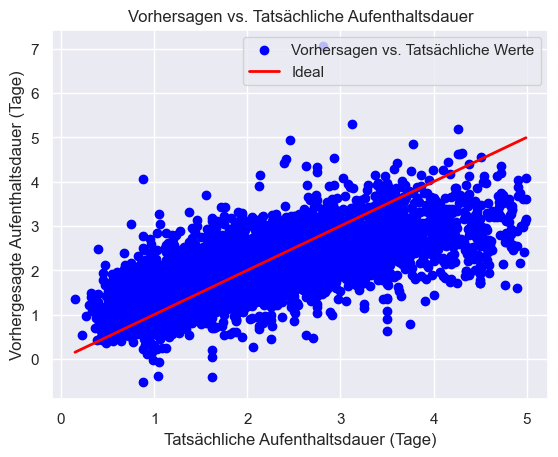

In [20]:
# Visualisierung der Vorhersagen vs. tatsächliche Werte
plt.scatter(y_test, predicted_y, color='blue', label='Vorhersagen vs. Tatsächliche Werte')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal')
plt.title('Vorhersagen vs. Tatsächliche Aufenthaltsdauer')
plt.xlabel('Tatsächliche Aufenthaltsdauer (Tage)')
plt.ylabel('Vorhergesagte Aufenthaltsdauer (Tage)')
plt.legend()
plt.show()
